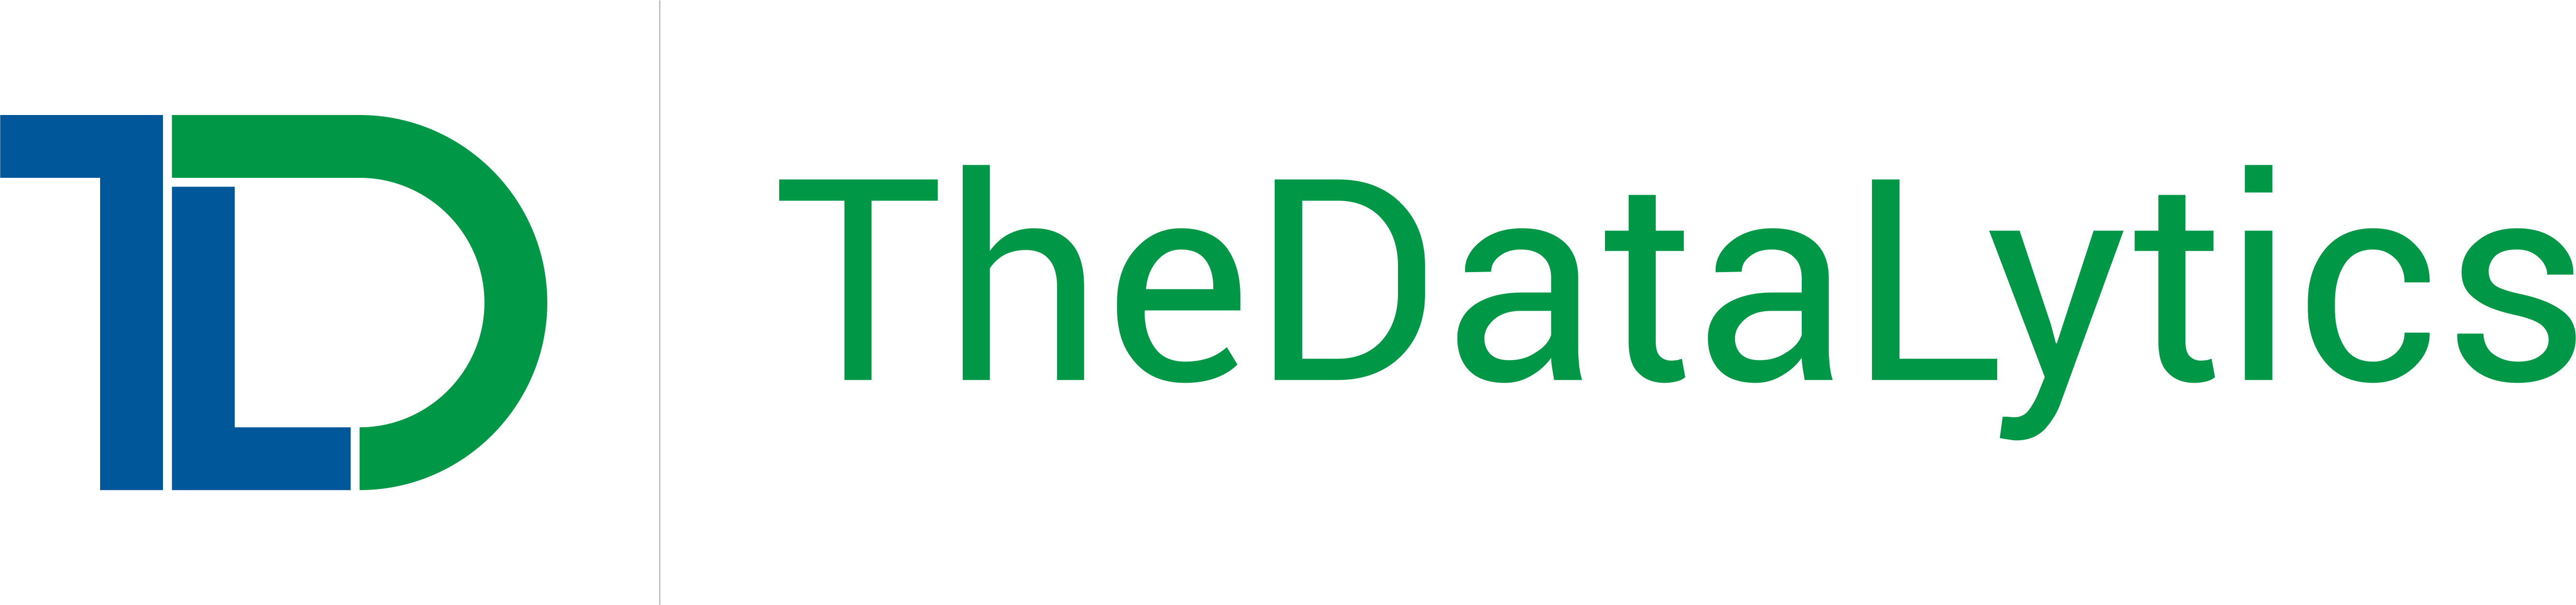

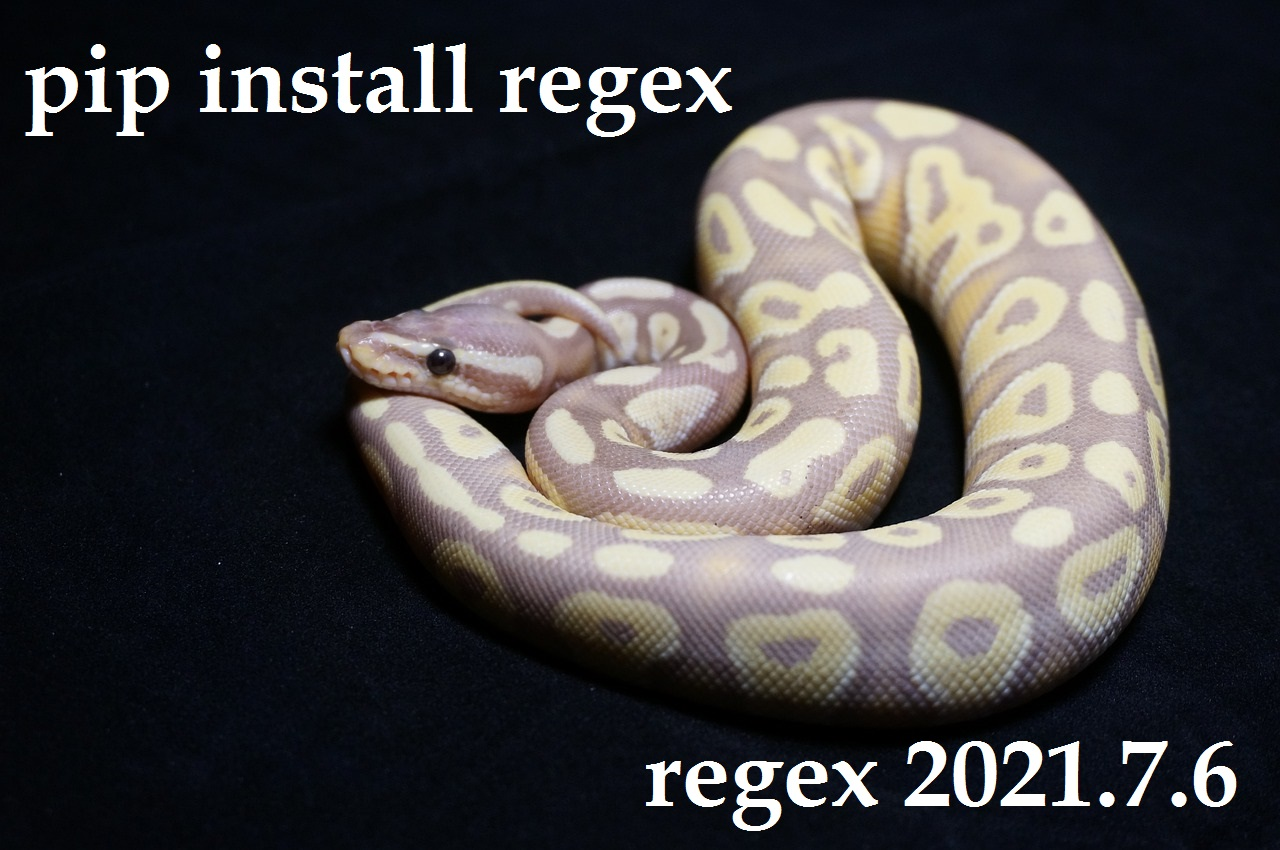

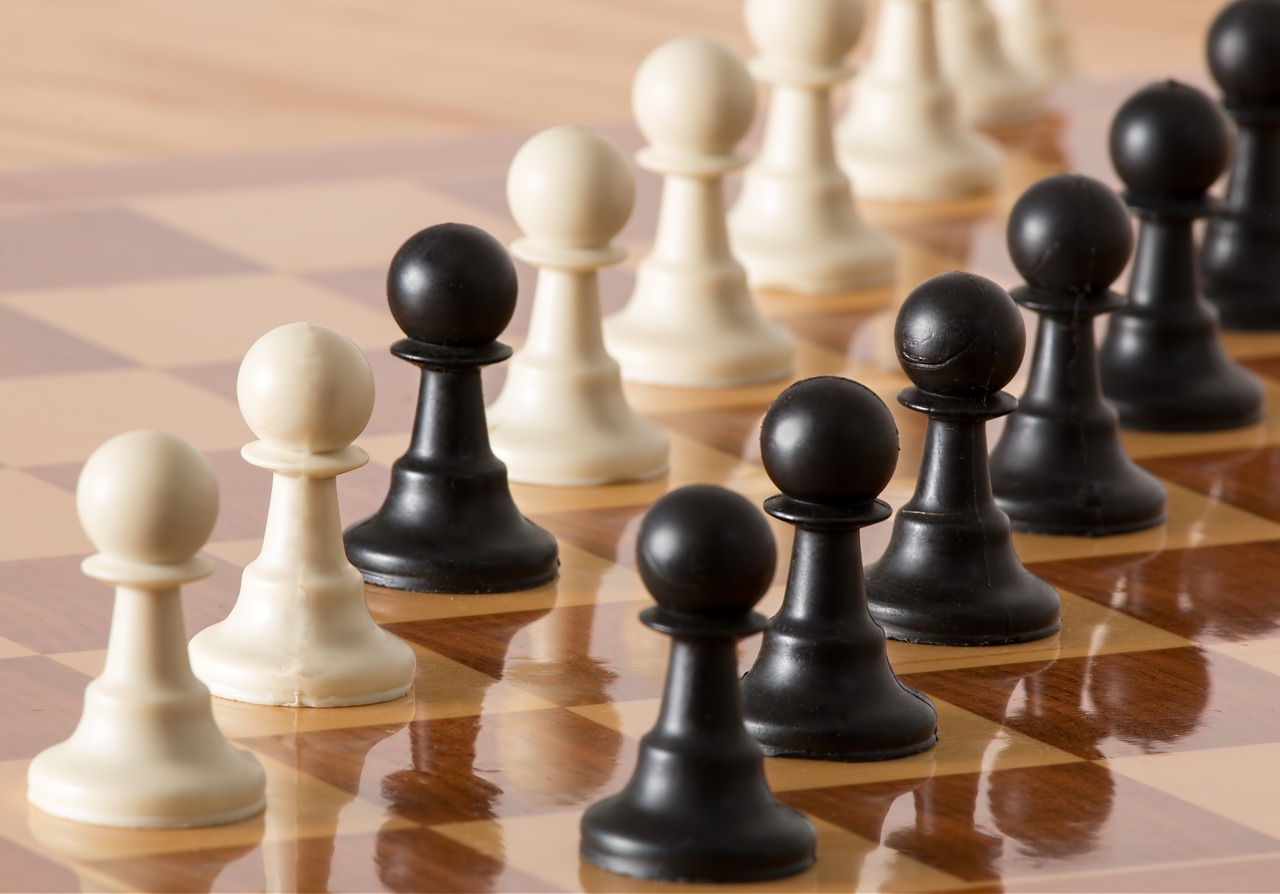

# Regular Expression

**https://docs.python.org/3/howto/regex.html**


**pip install regex**


Regular expressions (called REs, or regexes, or regex patterns) are essentially a tiny, highly specialized programming language embedded inside Python and made available through the re module. Using this little language, you specify the rules for the set of possible strings that you want to match; this set might contain English sentences, or e-mail addresses, or TeX commands, or anything you like. You can then ask questions such as “Does this string match the pattern?”, or “Is there a match for the pattern anywhere in this string?”. You can also use REs to modify a string or to split it apart in various ways.


Regular expression patterns are compiled into a series of bytecodes which are then executed by a matching engine written in C. For advanced use, it may be necessary to pay careful attention to how the engine will execute a given RE, and write the RE in a certain way in order to produce bytecode that runs faster. Optimization isn’t covered in this document, because it requires that you have a good understanding of the matching engine’s internals.


The regular expression language is relatively small and restricted, so not all possible string processing tasks can be done using regular expressions. There are also tasks that can be done with regular expressions, but the expressions turn out to be very complicated. In these cases, you may be better off writing Python code to do the processing; while Python code will be slower than an elaborate regular expression, it will also probably be more understandable.

https://docs.python.org/3/library/re.html

In [50]:
import re

**re.search(pattern, string, flags=0)**


Scan through string looking for the first location where the regular expression pattern produces a match, and return a corresponding match object. Return None if no position in the string matches the pattern; note that this is different from finding a zero-length match at some point in the string.

In [51]:
import re

txt = "The rain in Spain"
x = re.search("^The.*Spain$", txt)
print(x, txt)

<re.Match object; span=(0, 17), match='The rain in Spain'> The rain in Spain


In [52]:
import re

string = "Python is fun"

# check if 'Python' is at the beginning
match = re.search('\APython', string)

if match:
  print("pattern found inside the string")
else:
  print("pattern not found")  

# Output: pattern found inside the string

pattern found inside the string


**re.split(pattern, string, maxsplit=0, flags=0)**


Split string by the occurrences of pattern. If capturing parentheses are used in pattern, then the text of all groups in the pattern are also returned as part of the resulting list. If maxsplit is nonzero, at most maxsplit splits occur, and the remainder of the string is returned as the final element of the list.

In [53]:
import re

txt = "The rain in Spain"
x = re.split("\s", txt)
print(x)

['The', 'rain', 'in', 'Spain']


**re.sub(pattern, repl, string, count=0, flags=0)**


Return the string obtained by replacing the leftmost non-overlapping occurrences of pattern in string by the replacement repl. If the pattern isn’t found, string is returned unchanged. repl can be a string or a function; if it is a string, any backslash escapes in it are processed. That is, \n is converted to a single newline character, \r is converted to a carriage return, and so forth. Unknown escapes of ASCII letters are reserved for future use and treated as errors. Other unknown escapes such as \& are left alone. Backreferences, such as \6, are replaced with the substring matched by group 6 in the pattern.

In [54]:
import re

txt = "The rain in Spain"
x = re.sub("\s", "9", txt)
print(x)

The9rain9in9Spain


**re.match(pattern, string, flags=0)**


If zero or more characters at the beginning of string match the regular expression pattern, return a corresponding match object. Return None if the string does not match the pattern; note that this is different from a zero-length match.


Note that even in MULTILINE mode, re.match() will only match at the beginning of the string and not at the beginning of each line.


If you want to locate a match anywhere in string, use search() instead (see also search() vs. match()).

In [55]:
import re

pattern = '^a...s$'
test_string = 'abyss'
result = re.match(pattern, test_string)

if result:
  print("Search successful.")
else:
  print("Search unsuccessful.")	

Search successful.


**re.findall(pattern, string, flags=0)**


Return all non-overlapping matches of pattern in string, as a list of strings. The string is scanned left-to-right, and matches are returned in the order found. If one or more groups are present in the pattern, return a list of groups; this will be a list of tuples if the pattern has more than one group. Empty matches are included in the result.

In [56]:
# Program to extract numbers from a string

import re

string = 'hello 12 hi 89. Howdy 34'
pattern = '\d+'

result = re.findall(pattern, string) 
print(result)

# Output: ['12', '89', '34']

['12', '89', '34']


In [57]:
import re

string = '\n and \r are escape sequences.'

result = re.findall(r'[\n\r]', string) 
print(result)

# Output: ['\n', '\r']

['\n', '\r']


**re.split(pattern, string, maxsplit=0, flags=0)**


Split string by the occurrences of pattern. If capturing parentheses are used in pattern, then the text of all groups in the pattern are also returned as part of the resulting list. If maxsplit is nonzero, at most maxsplit splits occur, and the remainder of the string is returned as the final element of the list.

In [58]:
import re

string = 'Twelve:12 Eighty nine:89.'
pattern = '\d+'

result = re.split(pattern, string) 
print(result)

# Output: ['Twelve:', ' Eighty nine:', '.']

['Twelve:', ' Eighty nine:', '.']


In [59]:
import re

string = 'Twelve:12 Eighty nine:89 Nine:9.'
pattern = '\d+'

# maxsplit = 1
# split only at the first occurrence
result = re.split(pattern, string, 1) 
print(result)

# Output: ['Twelve:', ' Eighty nine:89 Nine:9.']

['Twelve:', ' Eighty nine:89 Nine:9.']


**re.sub(pattern, repl, string, count=0, flags=0)**


Return the string obtained by replacing the leftmost non-overlapping occurrences of pattern in string by the replacement repl. If the pattern isn’t found, string is returned unchanged. repl can be a string or a function; if it is a string, any backslash escapes in it are processed. That is, \n is converted to a single newline character, \r is converted to a carriage return, and so forth. Unknown escapes of ASCII letters are reserved for future use and treated as errors. Other unknown escapes such as \& are left alone. Backreferences, such as \6, are replaced with the substring matched by group 6 in the pattern.

In [60]:
# Program to remove all whitespaces
import re

# multiline string
string = 'abc 12\
de 23 \n f45 6'

# matches all whitespace characters
pattern = '\s+'

# empty string
replace = ''

new_string = re.sub(pattern, replace, string) 
print(new_string)

# Output: abc12de23f456

abc12de23f456


In [61]:
import re

# multiline string
string = 'abc 12\
de 23 \n f45 6'

# matches all whitespace characters
pattern = '\s+'
replace = ''

new_string = re.sub(r'\s+', replace, string, 1) 
print(new_string)

abc12de 23 
 f45 6


**re.subn(pattern, repl, string, count=0, flags=0)**


Perform the same operation as sub(), but return a tuple (new_string, number_of_subs_made).

In [62]:

# Program to remove all whitespaces
import re

# multiline string
string = 'abc 12\
de 23 \n f45 6'

# matches all whitespace characters
pattern = '\s+'

# empty string
replace = ''

new_string = re.subn(pattern, replace, string) 
print(new_string)

# Output: ('abc12de23f456', 4)

('abc12de23f456', 4)


In [63]:
import re

string = '39801 356, 2102 1111'

# Three digit number followed by space followed by two digit number
pattern = '(\d{3}) (\d{2})'

# match variable contains a Match object.
match = re.search(pattern, string) 

if match:
  print(match.group())
else:
  print("pattern not found")

# Output: 801 35

801 35


**re.match(pattern, string, flags=0)**


If zero or more characters at the beginning of string match the regular expression pattern, return a corresponding match object. Return None if the string does not match the pattern; note that this is different from a zero-length match.

Note that even in MULTILINE mode, re.match() will only match at the beginning of the string and not at the beginning of each line.

**re.fullmatch(pattern, string, flags=0)**


If the whole string matches the regular expression pattern, return a corresponding match object. Return None if the string does not match the pattern; note that this is different from a zero-length match.

In [64]:
#!/usr/bin/python
import re

line = "Cats are smarter than dogs"

matchObj = re.match( r'(.*) are (.*?) .*', line, re.M|re.I)

if matchObj:
   print ("matchObj.group() : ", matchObj.group())
   print ("matchObj.group(1) : ", matchObj.group(1))
   print ("matchObj.group(2) : ", matchObj.group(2))
else:
   print ("No match!!")

matchObj.group() :  Cats are smarter than dogs
matchObj.group(1) :  Cats
matchObj.group(2) :  smarter


In [65]:
import re
  
# compile() creates regular expression character class [a-e],
# which is equivalent to [abcde].
# class [abcde] will match with string with 'a', 'b', 'c', 'd', 'e'.
p = re.compile('[a-e]')
  
# findall() searches for the Regular Expression and return a list upon finding
print(p.findall("Aye, said Mr. Gibenson Stark"))

['e', 'a', 'd', 'b', 'e', 'a']


In [66]:
import re
  
# \d is equivalent to [0-9].
p = re.compile('\d')
print(p.findall("I went to him at 11 A.M. on 4th July 1886"))
  
# \d+ will match a group on [0-9], group of one or greater size
p = re.compile('\d+')
print(p.findall("I went to him at 11 A.M. on 4th July 1886"))

['1', '1', '4', '1', '8', '8', '6']
['11', '4', '1886']


In [67]:
import re
  
# \w is equivalent to [a-zA-Z0-9_].
p = re.compile('\w')
print(p.findall("He said * in some_lang."))
  
# \w+ matches to group of alphanumeric character.
p = re.compile('\w+')
print(p.findall("I went to him at 11 A.M., he said *** in some_language."))
  
# \W matches to non alphanumeric characters.
p = re.compile('\W')
print(p.findall("he said *** in some_language."))

['H', 'e', 's', 'a', 'i', 'd', 'i', 'n', 's', 'o', 'm', 'e', '_', 'l', 'a', 'n', 'g']
['I', 'went', 'to', 'him', 'at', '11', 'A', 'M', 'he', 'said', 'in', 'some_language']
[' ', ' ', '*', '*', '*', ' ', ' ', '.']


**re.compile(pattern, flags=0)**


Compile a regular expression pattern into a regular expression object, which can be used for matching using its match(), search() and other methods, described below.

The expression’s behaviour can be modified by specifying a flags value. Values can be any of the following variables, combined using bitwise OR (the | operator).

In [68]:
import re
  
# '*' replaces the no. of occurrence of a character.
p = re.compile('ab*')
print(p.findall("ababbaabbb"))

['ab', 'abb', 'a', 'abbb']


In [69]:
from re import split
  
# '\W+' denotes Non-Alphanumeric Characters or group of characters
# Upon finding ',' or whitespace ' ', the split(), splits the string from that point
print(split('\W+', 'Words, words , Words'))
print(split('\W+', "Word's words Words"))
  
# Here ':', ' ' ,',' are not AlphaNumeric thus, the point where splitting occurs
print(split('\W+', 'On 12th Jan 2016, at 11:02 AM'))
  
# '\d+' denotes Numeric Characters or group of characters
# Splitting occurs at '12', '2016', '11', '02' only
print(split('\d+', 'On 12th Jan 2016, at 11:02 AM'))

['Words', 'words', 'Words']
['Word', 's', 'words', 'Words']
['On', '12th', 'Jan', '2016', 'at', '11', '02', 'AM']
['On ', 'th Jan ', ', at ', ':', ' AM']


In [70]:
import re
  
# Splitting will occurs only once, at '12', returned list will have length 2
print(re.split('\d+', 'On 12th Jan 2016, at 11:02 AM', 1))
  
# 'Boy' and 'boy' will be treated same when flags = re.IGNORECASE
print(re.split('[a-f]+', 'Aey, Boy oh boy, come here', flags = re.IGNORECASE))
print(re.split('[a-f]+', 'Aey, Boy oh boy, come here'))

['On ', 'th Jan 2016, at 11:02 AM']
['', 'y, ', 'oy oh ', 'oy, ', 'om', ' h', 'r', '']
['A', 'y, Boy oh ', 'oy, ', 'om', ' h', 'r', '']


In [71]:
import re
  
# Regular Expression pattern 'ub' matches the string at "Subject" and "Uber".
# As the CASE has been ignored, using Flag, 'ub' should match twice with the string
# Upon matching, 'ub' is replaced by '~*' in "Subject", and in "Uber", 'Ub' is replaced.
print(re.sub('ub', '~*' , 'Subject has Uber booked already', flags = re.IGNORECASE))
  
# Consider the Case Sensitivity, 'Ub' in "Uber", will not be reaplced.
print(re.sub('ub', '~*' , 'Subject has Uber booked already'))
  
# As count has been given value 1, the maximum times replacement occurs is 1
print(re.sub('ub', '~*' , 'Subject has Uber booked already', count=1, flags = re.IGNORECASE))
  
# 'r' before the patter denotes RE, \s is for start and end of a String.
print(re.sub(r'\sAND\s', ' & ', 'Baked Beans And Spam', flags=re.IGNORECASE))

S~*ject has ~*er booked already
S~*ject has Uber booked already
S~*ject has Uber booked already
Baked Beans & Spam


In [72]:

import re
print(re.subn('ub', '~*' , 'Subject has Uber booked already'))
t = re.subn('ub', '~*' , 'Subject has Uber booked already', flags = re.IGNORECASE)
print(t)
print(len(t))
  
# This will give same output as sub() would have 
print(t[0])

('S~*ject has Uber booked already', 1)
('S~*ject has ~*er booked already', 2)
2
S~*ject has ~*er booked already


**re.escape(pattern)**


Escape special characters in pattern. This is useful if you want to match an arbitrary literal string that may have regular expression metacharacters in it.

In [73]:
import re
  
# escape() returns a string with BackSlash '\', before every Non-Alphanumeric Character
# In 1st case only ' ', is not alphanumeric
# In 2nd case, ' ', caret '^', '-', '[]', '\' are not alphanumeric
print(re.escape("This is Awseome even 1 AM"))
print(re.escape("I Asked what is this [a-9], he said \t ^WoW"))

This\ is\ Awseome\ even\ 1\ AM
I\ Asked\ what\ is\ this\ \[a\-9\],\ he\ said\ \	\ \^WoW


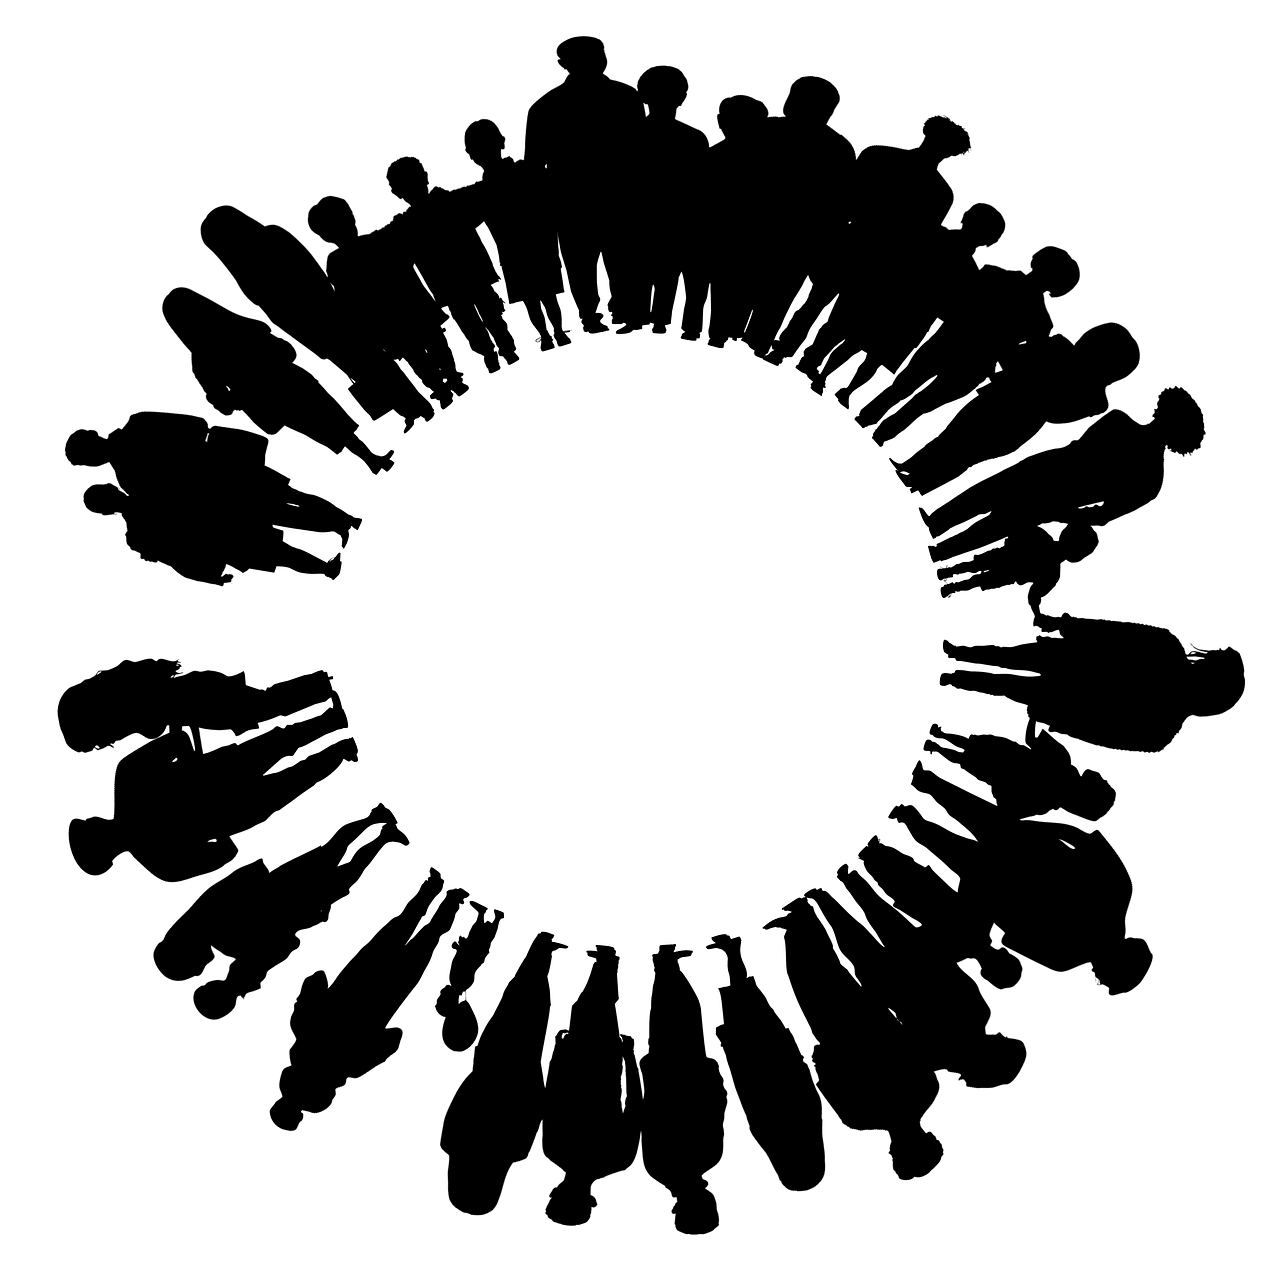